In [151]:
%load_ext autoreload
%autoreload 2
from board import *
from candy import *
from analysis import *
import matplotlib.pyplot as plt
import pandas as pd
from viz import Viz

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [178]:
df = pd.read_csv('results_backup/results_arena.csv')
df = pd.read_csv('explo_param_analysis_100.csv')
df = pd.read_csv('n_random_analysis_100.csv')
df = pd.read_csv('results_arena.csv')
time = pd.read_csv('time_arena.csv')


<Axes: >

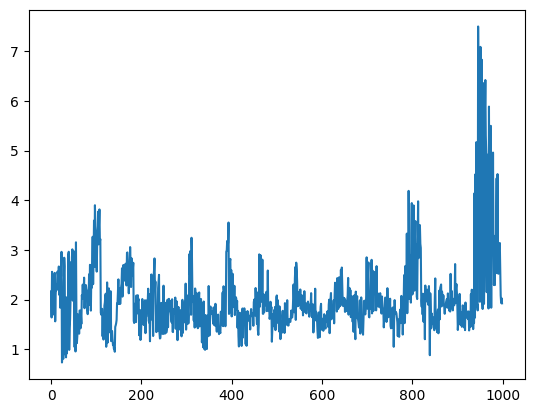

In [213]:
(time["mcts_base"] / time["mcts_fixed_depth"]).plot()

In [201]:

# Create a new DataFrame to store the adjusted scores
penalty_factor = 2  # Adjust this factor as needed
adjusted_score = pd.DataFrame(index=df.index, columns=df.columns)

# Apply the penalty to the scores
for strategy in df.columns:
    adjusted_score[strategy] = df[strategy] - penalty_factor * time[strategy]

# Display the adjusted scores
adjusted_score

,random,greedy,offline,mcts_base,mcts_fixed_depth,combined
0,2039.935985,7439.693926,2102.928981,3277.543740,6192.173475,13827.356649
1,2159.947987,1919.805951,6605.609494,3347.487766,1836.431235,2341.920839
2,3779.923981,3079.767948,1781.267027,3570.276001,1866.222848,6295.826677
3,2499.937984,2979.645914,2211.372890,1239.964749,19391.395277,7394.800674
4,3139.889975,5839.641913,30539.973866,7613.730561,19171.420959,13324.501166
...,...,...,...,...,...,...
995,2719.925984,3939.667920,2079.549519,17398.521955,9913.974791,9230.421736
996,1439.943987,4499.733936,1002.882273,18513.691041,9371.213663,9058.909886
997,1439.933983,2899.603904,1387.781319,3203.596852,3439.123814,3418.421393
998,2039.937985,4698.103326,2956.348617,4322.953149,7186.125496,10803.106937


/var/folders/n7/7ln3k6zx5hj40n1dc441clm40000gn/T/ipykernel_74880/315866121.py:12: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  rank_counts.plot(kind='bar', stacked=True, ax=ax1, colormap=cm.get_cmap('Blues_r'))


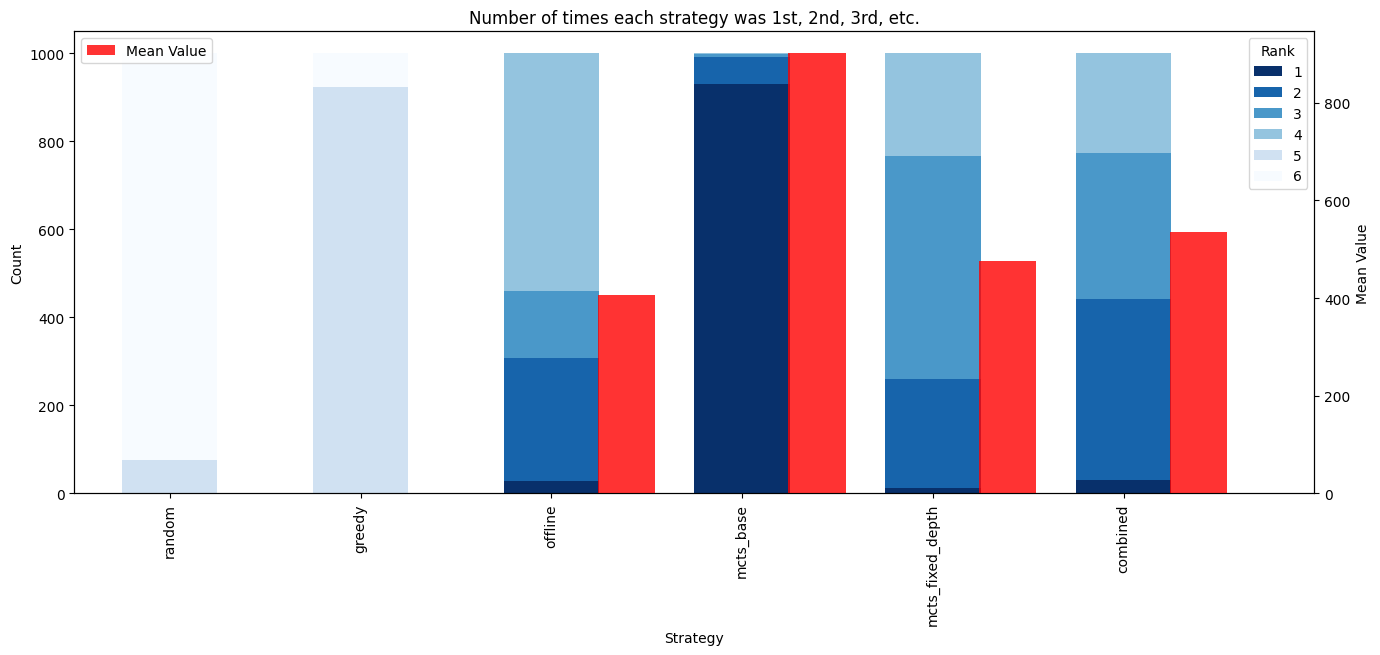

In [203]:

# Rank each row
ranks = time.rank(axis=1, method='min', ascending=False)

# Count the number of times each strategy was 1st, 2nd, 3rd, etc.
rank_counts = pd.DataFrame(0, index=time.columns, columns=range(1, len(time.columns) + 1))
for col in ranks.columns:
    rank_counts.loc[col] = ranks[col].value_counts().reindex(range(1, len(time.columns) + 1), fill_value=0)

# Plot stacked bar plot with strategies on the x-axis using a colormap
fig, ax1 = plt.subplots(figsize=(16, 6))

rank_counts.plot(kind='bar', stacked=True, ax=ax1, colormap=cm.get_cmap('Blues_r'))
ax1.set_xlabel('Strategy')
ax1.set_ylabel('Count')
ax1.set_title('Number of times each strategy was 1st, 2nd, 3rd, etc.')
ax1.legend(title='Rank')

# Create a second y-axis
ax2 = ax1.twinx()
time.mean().plot(kind='bar', color='red', ax=ax2, alpha=0.8, position=-0.81, width=0.3)
ax2.set_ylabel('Mean Value')
ax2.legend(['Mean Value'], loc='upper left')
plt.xlim(-0.5,6)
plt.show()

/var/folders/n7/7ln3k6zx5hj40n1dc441clm40000gn/T/ipykernel_74880/2254036682.py:12: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  rank_counts.plot(kind='bar', stacked=True, ax=ax1, colormap=cm.get_cmap('Blues_r'))


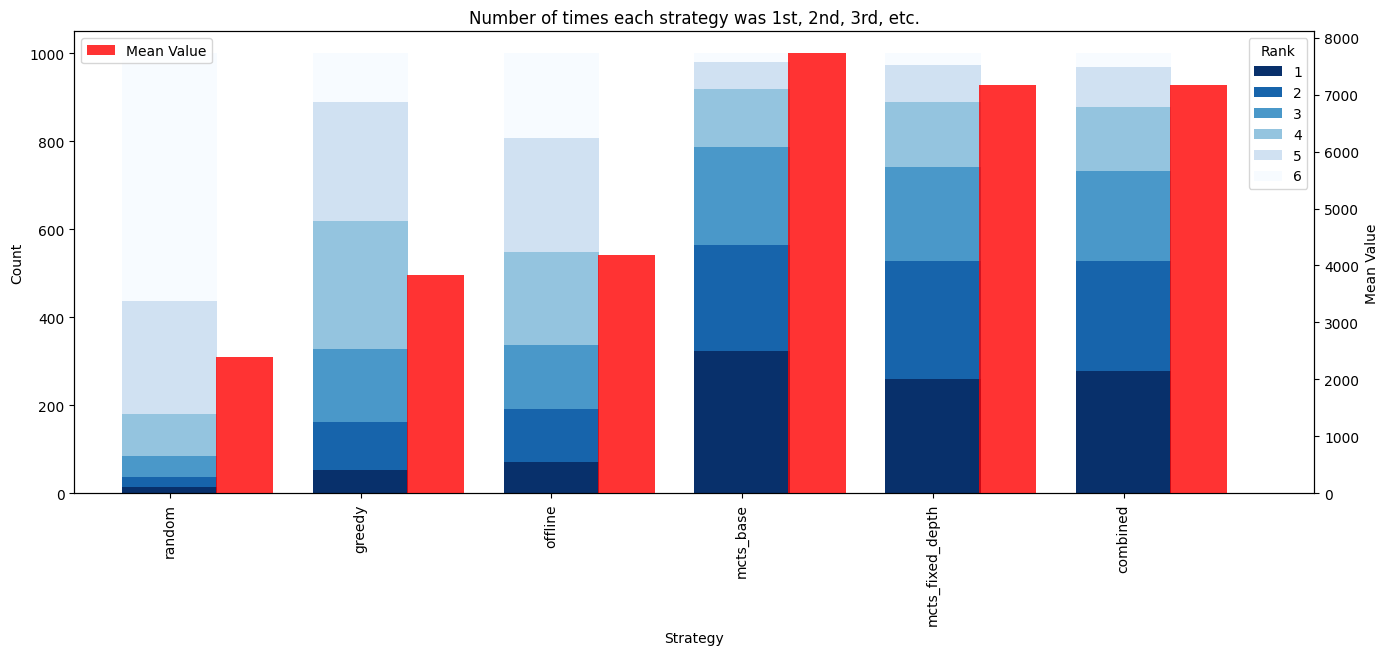

In [174]:

# Rank each row
ranks = df.rank(axis=1, method='min', ascending=False)

# Count the number of times each strategy was 1st, 2nd, 3rd, etc.
rank_counts = pd.DataFrame(0, index=df.columns, columns=range(1, len(df.columns) + 1))
for col in ranks.columns:
    rank_counts.loc[col] = ranks[col].value_counts().reindex(range(1, len(df.columns) + 1), fill_value=0)

# Plot stacked bar plot with strategies on the x-axis using a colormap
fig, ax1 = plt.subplots(figsize=(16, 6))

rank_counts.plot(kind='bar', stacked=True, ax=ax1, colormap=cm.get_cmap('Blues_r'))
ax1.set_xlabel('Strategy')
ax1.set_ylabel('Count')
ax1.set_title('Number of times each strategy was 1st, 2nd, 3rd, etc.')
ax1.legend(title='Rank')

# Create a second y-axis
ax2 = ax1.twinx()
df.mean().plot(kind='bar', color='red', ax=ax2, alpha=0.8, position=-0.81, width=0.3)
ax2.set_ylabel('Mean Value')
ax2.legend(['Mean Value'], loc='upper left')
plt.xlim(-0.5,6)
plt.show()

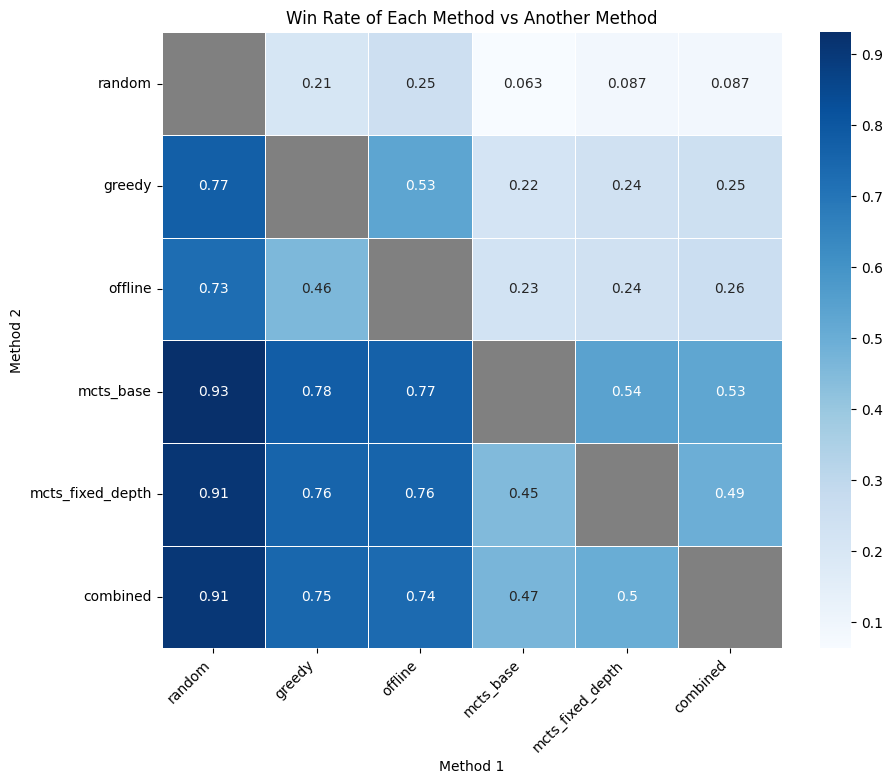

In [227]:

methods = df.columns
win_rates = pd.DataFrame(index=methods, columns=methods, dtype=float)

for method1 in methods:
    for method2 in methods:
        if method1 != method2:
            win_rate = (df[method1] > df[method2]).mean()
            win_rates.loc[method1, method2] = win_rate
        else:
            win_rates.loc[method1, method2] = None

# Plot heatmap
plt.figure(figsize=(10, 8))
cmap = sns.color_palette("Blues", as_cmap=True)
cmap.set_bad('grey')
cmap.set_extremes()
sns.heatmap(win_rates, annot=True, cmap=cmap, cbar=True, linewidths=.5)
plt.title('Win Rate of Each Method vs Another Method')
plt.xlabel('Method 1')
plt.ylabel('Method 2')

plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.show()

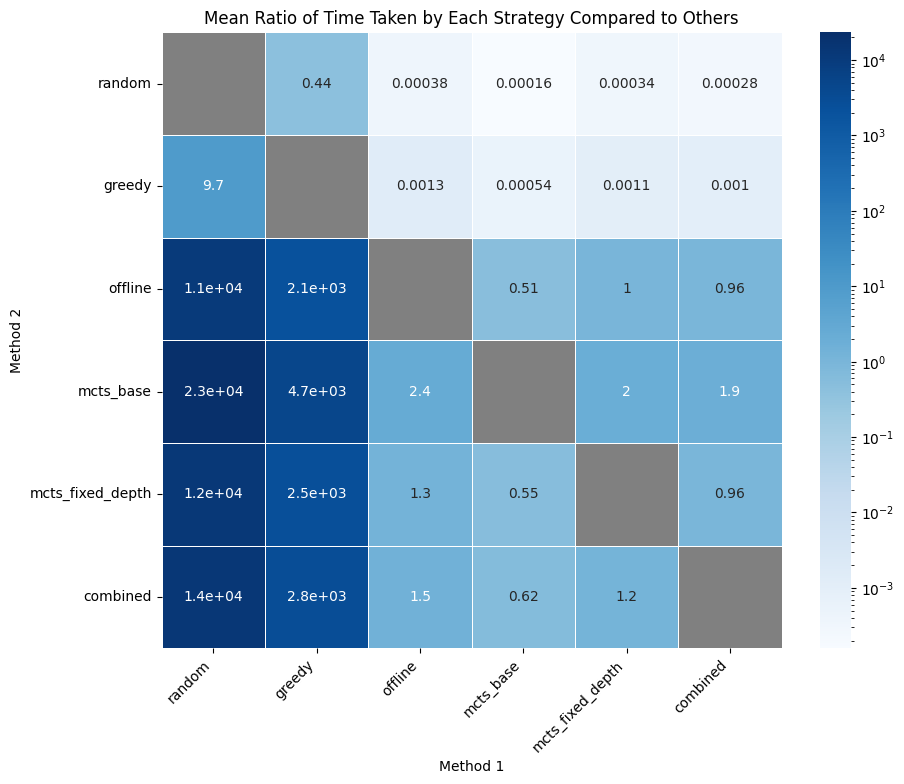

In [233]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm


# Calculate mean ratios
methods = time.columns
mean_ratios = pd.DataFrame(index=methods, columns=methods, dtype=float)

for method1 in methods:
    for method2 in methods:
        if method1 != method2:
            mean_ratio = (time[method1] / time[method2]).mean()
            mean_ratios.loc[method1, method2] = mean_ratio
        else:
            mean_ratios.loc[method1, method2] = None

# Plot heatmap with logarithmic color scale
plt.figure(figsize=(10, 8))
cmap = sns.color_palette("Blues", as_cmap=True)
cmap.set_bad('grey')
sns.heatmap(mean_ratios, annot=True, cmap=cmap, cbar=True, linewidths=.5, norm=LogNorm())
plt.title('Mean Ratio of Time Taken by Each Strategy Compared to Others')
plt.xlabel('Method 1')
plt.ylabel('Method 2')

plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.show()

In [41]:
wins = []
for idx in df.index:
    winner = None
    best_score = 0
    for col in df.columns:
        score = df.iloc[idx][col]
        if score > best_score:
            best_score = score
            winner = col
    wins.append(winner)    

In [42]:
for col in df.columns:  
    print(col, wins.count(col))

random 4
mcts_base 76
mcts_fixed_depth 56
offline 1
combined 63


In [43]:
for col in df.columns:  
    print(col, wins.count(col))

random 4
mcts_base 76
mcts_fixed_depth 56
offline 1
combined 63


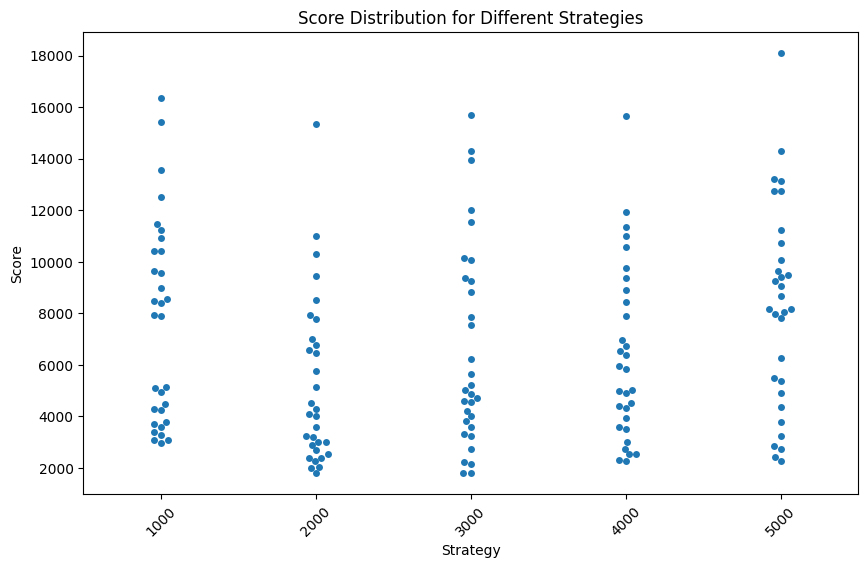

In [37]:
import seaborn as sns
# Melt the DataFrame to long format
df_melted = df.melt(var_name='Strategy', value_name='Score')

# Create a violin plot
plt.figure(figsize=(10, 6))
sns.swarmplot(x='Strategy', y='Score', data=df_melted)
plt.title('Score Distribution for Different Strategies')
plt.xlabel('Strategy')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.show()

In [35]:

# Melt the DataFrame to long format
df_melted = df.melt(var_name='Strategy', value_name='Score')

# Create a swarm plot
plt.figure(figsize=(10, 6))
sns.swarmplot(x='Strategy', y='Score', data=df_melted)
plt.title('Scores for Different Strategies')
plt.xlabel('Strategy')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.show()

NameError: name 'sns' is not defined

<Figure size 1000x600 with 0 Axes>

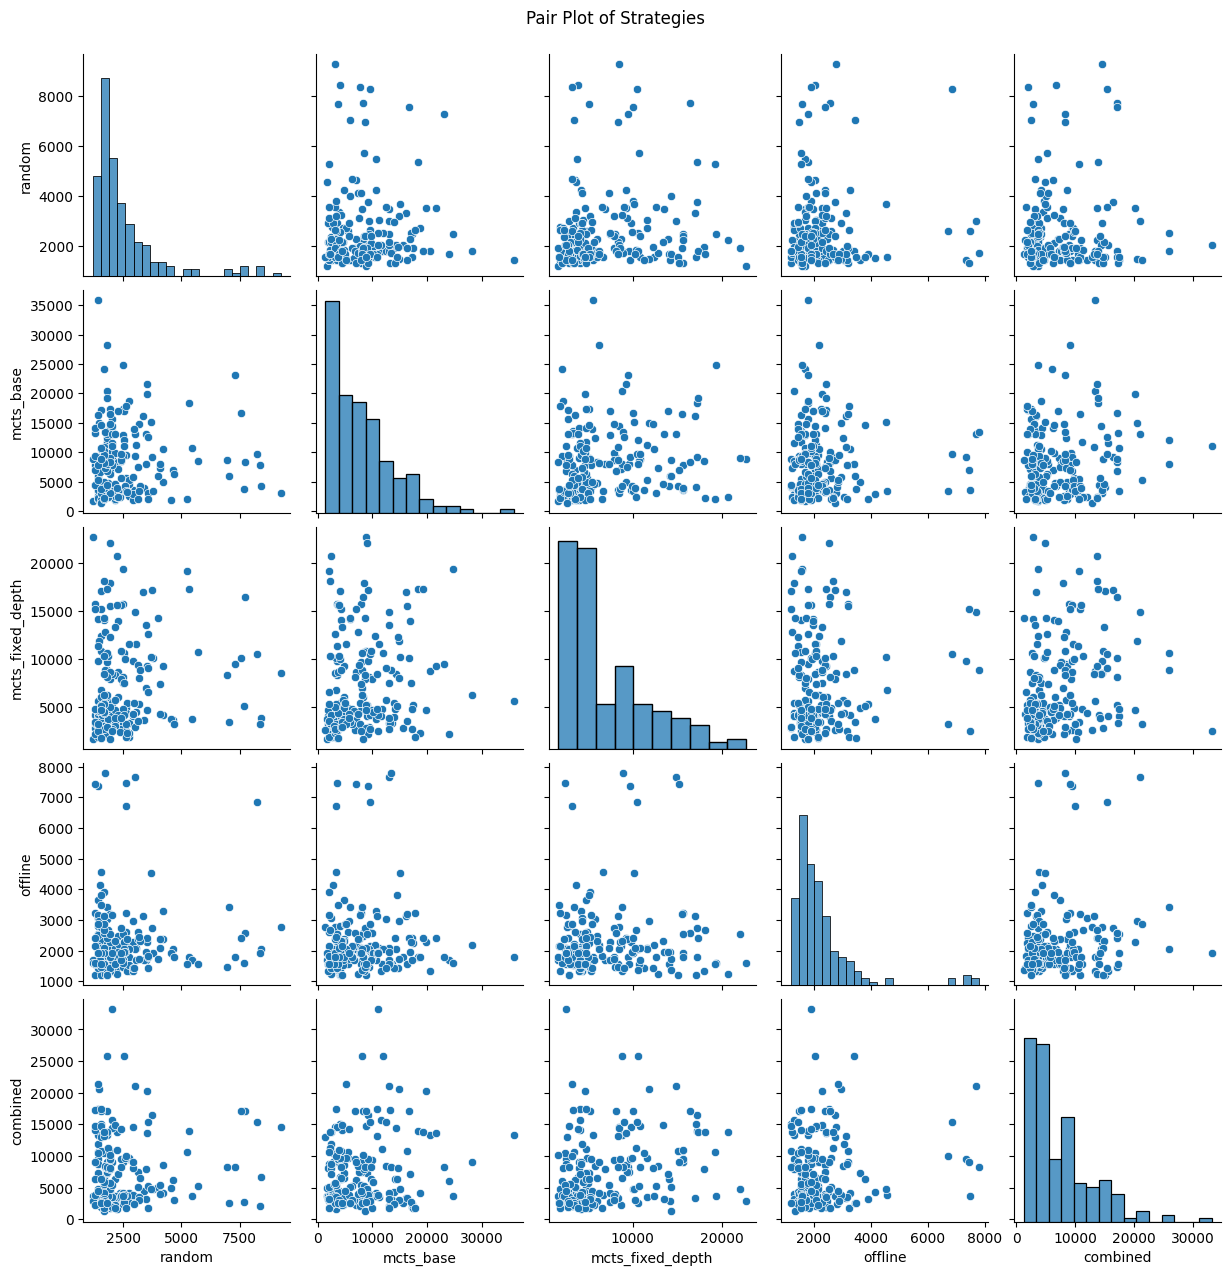

In [22]:
# Create a pair plot
sns.pairplot(df)
plt.suptitle('Pair Plot of Strategies', y=1.02)
plt.show()

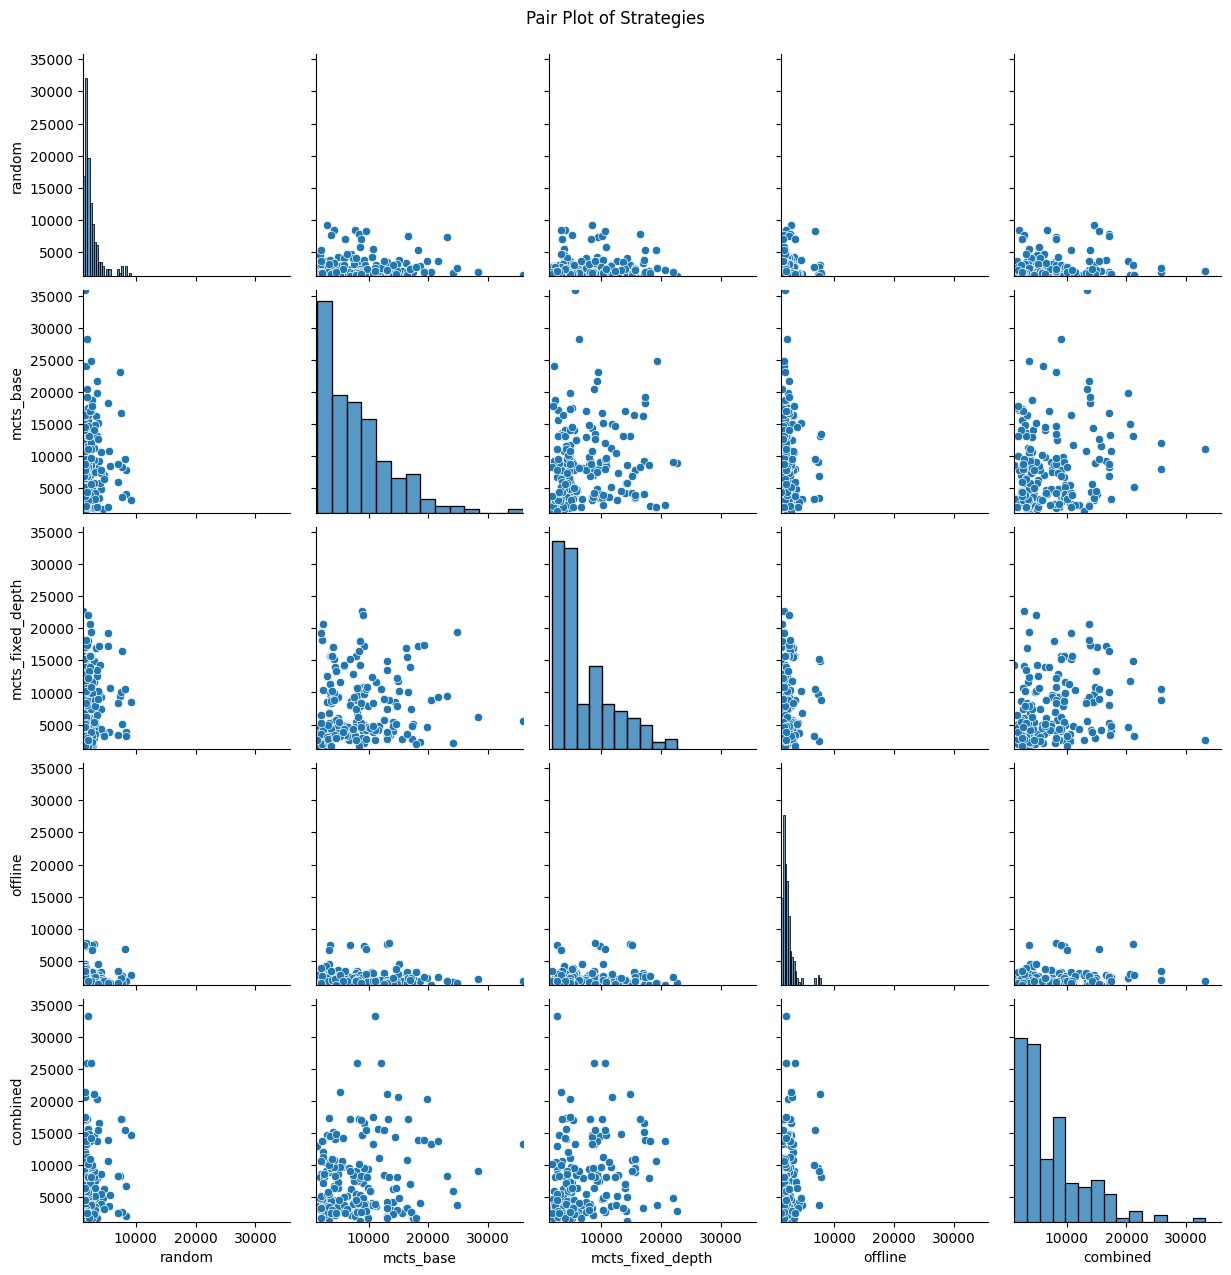

In [23]:

pairplot = sns.pairplot(df)

# Set the same xlim and ylim for all subplots
xlim = (df.min().min(), df.max().max())
ylim = (df.min().min(), df.max().max())

for ax in pairplot.axes.flatten():
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

plt.suptitle('Pair Plot of Strategies', y=1.02)
plt.show()